In [2]:
import tensorflow as tf

@tf.function
def hyperx_tf(x, k=1.0):
    """
    TensorFlow implementation of the HyperX Activation Function: x * tanh(kx)
    
    Parameters:
        x (tf.Tensor): Input tensor.
        k (float): Scaling factor for the input (default is 1.0).
    
    Returns:
        tf.Tensor: Output of the activation function.
    """
    return x * tf.tanh(k * x)


In [3]:
import tensorflow as tf

# Example usage
x = tf.constant([0.0, 0.5, 1.0, -0.5, -1.0], dtype=tf.float32)
k = 1.0
output = hyperx_tf(x, k)
print("TensorFlow HyperX Output:", output)


TensorFlow HyperX Output: tf.Tensor([0.         0.23105858 0.7615942  0.23105858 0.7615942 ], shape=(5,), dtype=float32)


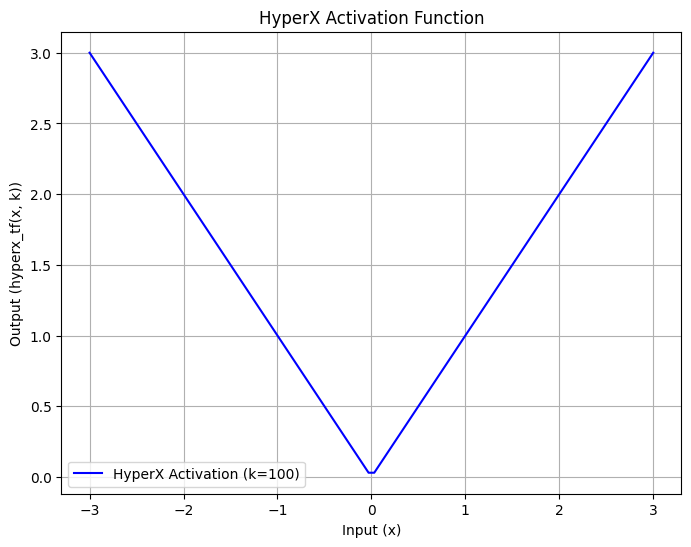

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from src.tensorflow_impl import hyperx_tf

# Example usage
x = tf.constant(np.linspace(-3.0, 3.0, 100), dtype=tf.float32)  # Input range for x
k = 100
output = hyperx_tf(x, k)

# Plotting the input vs output
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), output.numpy(), label=f"HyperX Activation (k={k})", color='b')
plt.title('HyperX Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (hyperx_tf(x, k))')
plt.grid(True)
plt.legend()
plt.show()


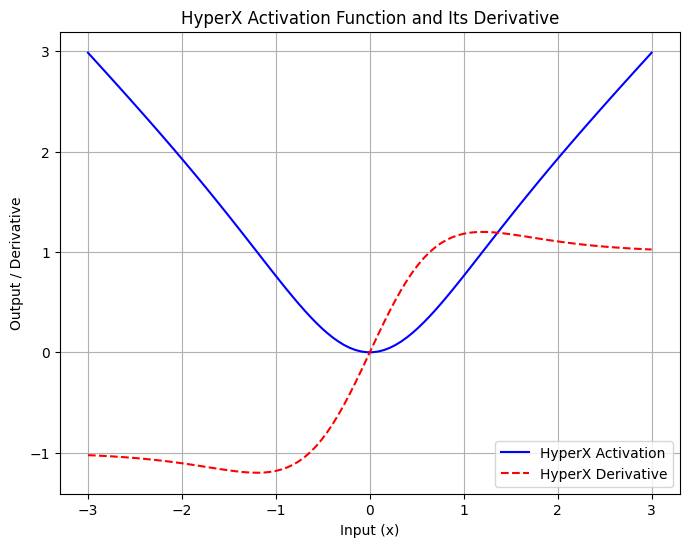

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def hyperx_tf(x, k=1.0):
    """HyperX Activation Function: x * tanh(kx)."""
    return x * tf.tanh(k * x)

@tf.function
def hyperx_derivative_tf(x, k=1.0):
    """Derivative of the HyperX Activation Function."""
    tanh_kx = tf.tanh(k * x)
    return tanh_kx + x * k * (1 - tf.square(tanh_kx))

# Input range for x
x = tf.constant(np.linspace(-3.0, 3.0, 100), dtype=tf.float32)
k = 1.0

# Compute function and derivative
output = hyperx_tf(x, k)
derivative = hyperx_derivative_tf(x, k)

# Plot the function and its derivative
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), output.numpy(), label="HyperX Activation", color='b')
plt.plot(x.numpy(), derivative.numpy(), label="HyperX Derivative", color='r', linestyle='--')
plt.title('HyperX Activation Function and Its Derivative')
plt.xlabel('Input (x)')
plt.ylabel('Output / Derivative')
plt.legend()
plt.grid(True)
plt.show()


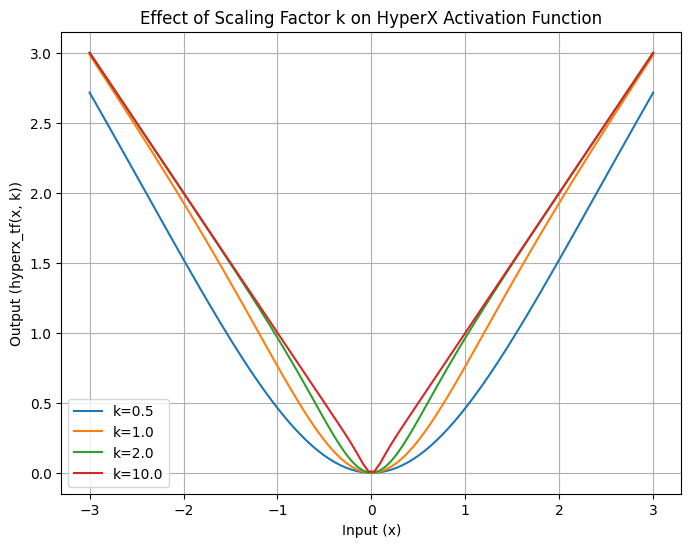

In [7]:
k_values = [0.5, 1.0, 2.0,10.0]  # Different values of k
x = tf.constant(np.linspace(-3.0, 3.0, 100), dtype=tf.float32)

plt.figure(figsize=(8, 6))

# Plot for each k
for k in k_values:
    output = hyperx_tf(x, k)
    plt.plot(x.numpy(), output.numpy(), label=f'k={k}')

plt.title('Effect of Scaling Factor k on HyperX Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (hyperx_tf(x, k))')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import Model, layers

# Custom activation wrapper for Keras
def hyperx_activation(x, k=1.0):
    return x * tf.tanh(k * x)

# Build a simple neural network
class HyperXModel(Model):
    def __init__(self, k=1.0):
        super(HyperXModel, self).__init__()
        self.dense1 = layers.Dense(128, activation=lambda x: hyperx_activation(x, k))
        self.dense2 = layers.Dense(64, activation=lambda x: hyperx_activation(x, k))
        self.out = layers.Dense(1, activation='sigmoid')  # Example output layer for binary classification

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.out(x)

# Generate example data
x_train = np.random.randn(1000, 10).astype(np.float32)
y_train = np.random.randint(0, 2, size=(1000, 1)).astype(np.float32)

# Compile and train the model
model = HyperXModel(k=1.0)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
32/32 [==============================] - 1s 4ms/step - loss: 0.6970 - accuracy: 0.5100
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5740
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5970
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5970
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.5980
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6100
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6240
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.6270
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6560
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.6720
Epoch 11/20
32/32 [


Training with HyperX activation...
Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.2356 - accuracy: 0.9316 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0931 - accuracy: 0.9728 - val_loss: 0.0993 - val_accuracy: 0.9716
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0649 - accuracy: 0.9800 - val_loss: 0.1042 - val_accuracy: 0.9695
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0943 - val_accuracy: 0.9743
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0931 - val_accuracy: 0.9745

Training with ReLU activation...
Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2794 - accuracy: 0.9200 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1199 - ac

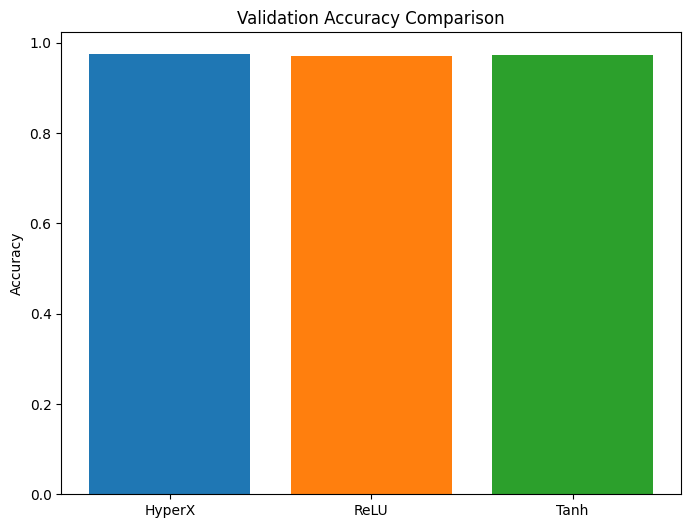

In [7]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import time

# Custom HyperX Activation Function
def hyperx_activation(x, k=1.0):
    return x * tf.tanh(k * x)

# Define a simple feedforward neural network
class SimpleModel(Model):
    def __init__(self, activation_fn, k=1.0):
        super(SimpleModel, self).__init__()
        self.flatten = layers.Flatten()
        if activation_fn == "HyperX":
            activation = lambda x: hyperx_activation(x, k)
        elif activation_fn == "ReLU":
            activation = tf.nn.relu
        elif activation_fn == "Tanh":
            activation = tf.nn.tanh
        else:
            raise ValueError("Unsupported activation function")

        self.dense1 = layers.Dense(128, activation=activation)
        self.dense2 = layers.Dense(64, activation=activation)
        self.out = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.out(x)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Training and evaluating different activation functions
activations = ["HyperX", "ReLU", "Tanh"]
results = {}

for activation in activations:
    print(f"\nTraining with {activation} activation...")
    model = SimpleModel(activation_fn=activation, k=1.0)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Record time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    end_time = time.time()
    
    # Store results
    results[activation] = {
        'train_accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'training_time': end_time - start_time
    }

# Compare Results
for activation, result in results.items():
    print(f"\n{activation} Activation:")
    print(f"Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"Training Time: {result['training_time']:.2f} seconds")

# Plot comparison
plt.figure(figsize=(8, 6))
for activation in activations:
    plt.bar(activation, results[activation]['val_accuracy'], label=activation)
plt.title("Validation Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [9]:
import tensorflow as tf

class HyperXActivation(tf.keras.layers.Layer):
    """
    TensorFlow implementation of the HyperX Activation Function: x * tanh(kx)
    """
    def __init__(self, k=1.0, **kwargs):
        super(HyperXActivation, self).__init__(**kwargs)
        self.k = k

    def call(self, inputs):
        return inputs * tf.math.tanh(self.k * inputs)

# Example usage
x = tf.constant([0.0, 0.5, 1.0, -0.5, -1.0], dtype=tf.float32)
k = 2.0
activation = HyperXActivation(k)
output = activation(x)
print("TensorFlow HyperX Output:", output.numpy())


TensorFlow HyperX Output: [0.        0.3807971 0.9640276 0.3807971 0.9640276]


In [10]:
from tensorflow.keras import layers, models, optimizers, losses
import tensorflow.keras.datasets.cifar10 as cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# CNN Model with HyperX Activation
def build_cnn_with_hyperx(k):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=None, input_shape=(32, 32, 3)),
        HyperXActivation(k=k),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation=None),
        HyperXActivation(k=k),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation=None),
        HyperXActivation(k=k),
        layers.Dense(10, activation="softmax")
    ])
    return model

# Compile and train the model
k_value = 2.0
model_hyperx = build_cnn_with_hyperx(k=k_value)
model_hyperx.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                     loss=losses.CategoricalCrossentropy(),
                     metrics=['accuracy'])

# Train the model
history_hyperx = model_hyperx.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_hyperx.evaluate(x_test, y_test, verbose=2)
print(f"HyperX (k={k_value}) Test Accuracy: {test_acc:.4f}")


Epoch 1/5
782/782 [==============================] - 68s 85ms/step - loss: 1.5639 - accuracy: 0.4427 - val_loss: 1.2990 - val_accuracy: 0.5480
Epoch 2/5
782/782 [==============================] - 66s 84ms/step - loss: 1.1963 - accuracy: 0.5773 - val_loss: 1.1100 - val_accuracy: 0.6116
Epoch 3/5
782/782 [==============================] - 58s 75ms/step - loss: 1.0486 - accuracy: 0.6353 - val_loss: 1.0155 - val_accuracy: 0.6545
Epoch 4/5
782/782 [==============================] - 60s 77ms/step - loss: 0.9505 - accuracy: 0.6712 - val_loss: 1.0151 - val_accuracy: 0.6476
Epoch 5/5
782/782 [==============================] - 63s 80ms/step - loss: 0.8702 - accuracy: 0.6976 - val_loss: 1.0364 - val_accuracy: 0.6516
313/313 - 4s - loss: 1.0364 - accuracy: 0.6516 - 4s/epoch - 12ms/step
HyperX (k=2.0) Test Accuracy: 0.6516


In [11]:
k_values = [1.0, 1.5, 2.0, 2.5, 3.0]
results = {}

for k in k_values:
    print(f"\nTraining with HyperX Activation (k={k}):")
    model = build_cnn_with_hyperx(k)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test)
    results[k] = test_acc
    print(f"Test Accuracy with k={k}: {test_acc:.4f}")

# Print results
print("HyperX Results for different k-values:")
for k, acc in results.items():
    print(f"k={k}: Test Accuracy = {acc:.4f}")



Training with HyperX Activation (k=1.0):
Epoch 1/5
782/782 [==============================] - 59s 74ms/step - loss: 1.6312 - accuracy: 0.4209 - val_loss: 1.3750 - val_accuracy: 0.5087
Epoch 2/5
782/782 [==============================] - 59s 76ms/step - loss: 1.2713 - accuracy: 0.5542 - val_loss: 1.2087 - val_accuracy: 0.5831
Epoch 3/5
782/782 [==============================] - 48s 62ms/step - loss: 1.1093 - accuracy: 0.6150 - val_loss: 1.1220 - val_accuracy: 0.6139
Epoch 4/5
782/782 [==============================] - 53s 68ms/step - loss: 1.0005 - accuracy: 0.6530 - val_loss: 1.0941 - val_accuracy: 0.6288
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 1.0293 - accuracy: 0.6467
Test Accuracy with k=1.0: 0.6467

Training with HyperX Activation (k=1.5):
Epoch 1/5
782/782 [==============================] - 62s 77ms/step - loss: 1.5532 - accuracy: 0.4491 - val_loss: 1.3400 - val_accuracy: 0.5283
Epoch 2/5
782/782 [==============================] - 58s 75ms/step -

In [12]:
from tensorflow.keras.applications import ResNet50

# Modify ResNet50 to use HyperX
def build_resnet_with_hyperx(k):
    base_model = ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)
    
    def replace_relu(layer):
        if isinstance(layer, tf.keras.layers.ReLU):
            return HyperXActivation(k=k)
        return layer

    # Replace ReLU with HyperX
    for i, layer in enumerate(base_model.layers):
        if hasattr(layer, 'activation') and layer.activation == tf.keras.activations.relu:
            base_model.layers[i].activation = HyperXActivation(k=k).call
    return base_model

# Train ResNet with HyperX
model_resnet_hyperx = build_resnet_with_hyperx(k=2.0)
model_resnet_hyperx.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_resnet_hyperx.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
322/782 [===========>..................] - ETA: 24:15 - loss: 2.6872 - accuracy: 0.1392

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

def visualize_activation_outputs(activation_layer, inputs):
    outputs = activation_layer(inputs)
    outputs = outputs.numpy().flatten()
    plt.hist(outputs, bins=100, alpha=0.7, label=f'{activation_layer.name} Outputs')
    plt.title(f"{activation_layer.name} Output Distribution")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Test activations
inputs = tf.random.normal([1000])
visualize_activation_outputs(HyperXActivation(k=2.0), inputs)
visualize_activation_outputs(tf.keras.layers.ReLU(), inputs)
visualize_activation_outputs(tf.keras.layers.Activation('tanh'), inputs)


In [ ]:
def log_gradients(model, inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = losses.categorical_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    grad_norms = [tf.norm(grad).numpy() for grad in gradients if grad is not None]
    return sum(grad_norms) / len(grad_norms)

# Example during training
for epoch in range(5):
    grad_norm = log_gradients(model_hyperx, tf.convert_to_tensor(x_train[:128]), tf.convert_to_tensor(y_train[:128]))
    print(f"Epoch {epoch+1}, Avg Grad Norm: {grad_norm:.4f}")


In [ ]:
import time

start_time = time.time()
model_hyperx.fit(x_train, y_train, epochs=1, batch_size=64, verbose=0)
end_time = time.time()
print(f"Training Time for HyperX: {end_time - start_time:.2f} seconds")


# **HyperX after some changes**

In [8]:
import tensorflow as tf

class HyperXActivationTF:
    """
    TensorFlow implementation of the HyperX Activation Function: x * tanh(kx).
    """
    def __init__(self, k=1.0):
        """
        Initializes the activation function with a scaling factor k.
        """
        self.k = tf.Variable(k, dtype=tf.float32, trainable=False)

    @tf.function
    def __call__(self, x):
        """
        Applies the HyperX activation function.
        
        Parameters:
            x (tf.Tensor): Input tensor.
        
        Returns:
            tf.Tensor: Output tensor after applying activation.
        """
        return x * tf.tanh(self.k * x)

    def set_k(self, new_k):
        """
        Updates the scaling factor k.
        
        Parameters:
            new_k (float): New value for the scaling factor k.
        """
        self.k.assign(new_k)


In [9]:
# Initialize the activation with k=1.0
activation_tf = HyperXActivationTF(k=1.0)

# Apply the activation to some tensor
x = tf.constant([1.0, 2.0, -3.0], dtype=tf.float32)
output = activation_tf(x)
print("Output:", output.numpy())

# Change the value of k dynamically
activation_tf.set_k(2.0)
output_new = activation_tf(x)
print("Output with new k:", output_new.numpy())


Output: [0.7615942 1.9280552 2.9851642]
Output with new k: [0.9640276 1.9986584 2.9999635]


In [10]:
import tensorflow as tf

# Define the HyperX Activation Function class
class HyperXActivationTF:
    def __init__(self, k=1.0):
        self.k = tf.Variable(k, dtype=tf.float32, trainable=False)

    @tf.function
    def __call__(self, x):
        return x * tf.tanh(self.k * x)

    def set_k(self, new_k):
        self.k.assign(new_k)

# Define a simple NN using HyperX activation
class SimpleNN(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, output_dim, activation):
        super(SimpleNN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden_dim)
        self.activation = activation
        self.dense2 = tf.keras.layers.Dense(output_dim)

    def call(self, x):
        x = self.dense1(x)
        x = self.activation(x)
        x = self.dense2(x)
        return x

# Instantiate the activation and model
activation_tf = HyperXActivationTF(k=1.0)
model = SimpleNN(input_dim=2, hidden_dim=32, output_dim=1, activation=activation_tf)

# Generate synthetic data for training
X = tf.random.normal((1000, 2))
y = tf.reduce_sum(X, axis=1, keepdims=True) + tf.random.normal((1000, 1))

# Compile and train the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X, y, epochs=15, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"TensorFlow Model - Loss: {loss}, MAE: {mae}")


Epoch 1/15
32/32 [==============================] - 1s 2ms/step - loss: 2.8600 - mae: 1.3266
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 2.6327 - mae: 1.2756
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 2.3963 - mae: 1.2188
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 2.1197 - mae: 1.1461
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 1.8047 - mae: 1.0571
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 1.4817 - mae: 0.9637
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 1.2276 - mae: 0.8877
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0734 - mae: 0.8375
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0080 - mae: 0.8171
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9835 - mae: 0.8087
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - lo

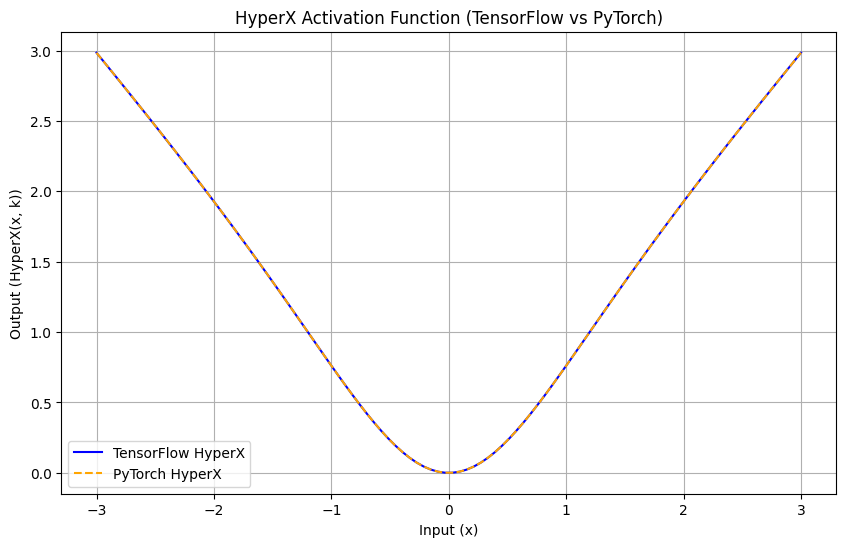

In [11]:
# TensorFlow: Plot the HyperX Activation function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# HyperX Activation Function for TensorFlow
class HyperXActivationTF:
    def __init__(self, k=1.0):
        self.k = tf.Variable(k, dtype=tf.float32, trainable=False)

    @tf.function
    def __call__(self, x):
        return x * tf.tanh(self.k * x)

# Create TensorFlow HyperX instance and data
k_tf = 1.0
activation_tf = HyperXActivationTF(k=k_tf)
x_tf = tf.linspace(-3.0, 3.0, 100)
y_tf = activation_tf(x_tf)

# PyTorch: Plot the HyperX Activation function
import torch

# HyperX Activation Function for PyTorch
class HyperXActivationTorch(torch.nn.Module):
    def __init__(self, k=1.0):
        super(HyperXActivationTorch, self).__init__()
        self.k = torch.nn.Parameter(torch.tensor(k, dtype=torch.float32), requires_grad=False)

    def forward(self, x):
        return x * torch.tanh(self.k * x)

# Create PyTorch HyperX instance and data
k_torch = 1.0
activation_torch = HyperXActivationTorch(k=k_torch)
x_torch = torch.linspace(-3.0, 3.0, 100)
y_torch = activation_torch(x_torch)

# Plot both TensorFlow and PyTorch results
plt.figure(figsize=(10, 6))
plt.plot(x_tf.numpy(), y_tf.numpy(), label='TensorFlow HyperX', color='blue')
plt.plot(x_torch.numpy(), y_torch.detach().numpy(), label='PyTorch HyperX', color='orange', linestyle='--')
plt.title("HyperX Activation Function (TensorFlow vs PyTorch)")
plt.xlabel("Input (x)")
plt.ylabel("Output (HyperX(x, k))")
plt.grid(True)
plt.legend()
plt.show()


# **Improved HyperX**

In [12]:
import tensorflow as tf

class ImprovedHyperXActivationTF(tf.keras.layers.Layer):
    """
    Improved TensorFlow implementation of the HyperX Activation Function with additional features:
    - Clipping for bounded outputs.
    - Learnable parameter k.
    - Residual connection to prevent vanishing gradients.
    - Hybrid activation to combine with ReLU for sparsity.
    """
    def __init__(self, initial_k=1.0, clip_min=-10.0, clip_max=10.0, threshold=0.1, use_residual=True):
        super(ImprovedHyperXActivationTF, self).__init__()
        self.k = tf.Variable(initial_k, dtype=tf.float32, trainable=True)
        self.clip_min = clip_min
        self.clip_max = clip_max
        self.threshold = threshold
        self.use_residual = use_residual

    def call(self, x):
        """
        Forward pass of the improved HyperX activation function.
        
        Parameters:
            x (tf.Tensor): Input tensor.
        
        Returns:
            tf.Tensor: Output tensor after applying activation.
        """
        # Apply the HyperX function
        hyperx_output = x * tf.tanh(self.k * x)
        
        # Residual connection
        if self.use_residual:
            hyperx_output = hyperx_output + 0.1 * x
        
        # Clipping to bounded output
        hyperx_output = tf.clip_by_value(hyperx_output, clip_value_min=self.clip_min, clip_value_max=self.clip_max)
        
        # Thresholding for sparsity
        hyperx_output = tf.where(
            tf.abs(hyperx_output) > self.threshold,
            hyperx_output,
            tf.zeros_like(hyperx_output)
        )
        
        return hyperx_output

# Example: Using the activation in a neural network
class SimpleNN(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(128)
        self.activation = ImprovedHyperXActivationTF(initial_k=1.0)
        self.fc2 = tf.keras.layers.Dense(output_dim)

    def call(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Test the model
model = SimpleNN(input_dim=10, output_dim=2)
example_input = tf.random.normal((5, 10))
output = model(example_input)
print(output)


tf.Tensor(
[[-0.38679427 -0.43846732]
 [ 0.00191843 -0.17990124]
 [-0.06090958 -0.419716  ]
 [-0.06474845 -0.4020564 ]
 [ 0.02161977 -0.3056553 ]], shape=(5, 2), dtype=float32)
